# SMS Spam Classification

### Installing Dependicies

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import pandas
import sklearn
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import nltk
import warnings
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score,learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Preprocessing and Exploring the Dataset

Importing the Dataset spam.csv

In [2]:
data = pd.read_csv('data/spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Removing unwanted columns

In [3]:
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v2" : "text", "v1":"label"})

In [4]:
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

### Creating corpus of spam and non-spam messages

In [6]:
ham_words = ''
spam_words = ''

In [7]:
for val in data[data['label'] == 'spam'].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        spam_words = spam_words + words + ' '
        
for val in data[data['label'] == 'ham'].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        ham_words = ham_words + words + ' '

### Creating world cloud of spam and non-spam messages

In [8]:
spam_wordcloud = WordCloud(width=500, height=300).generate(spam_words)
ham_wordcloud = WordCloud(width=500, height=300).generate(ham_words)

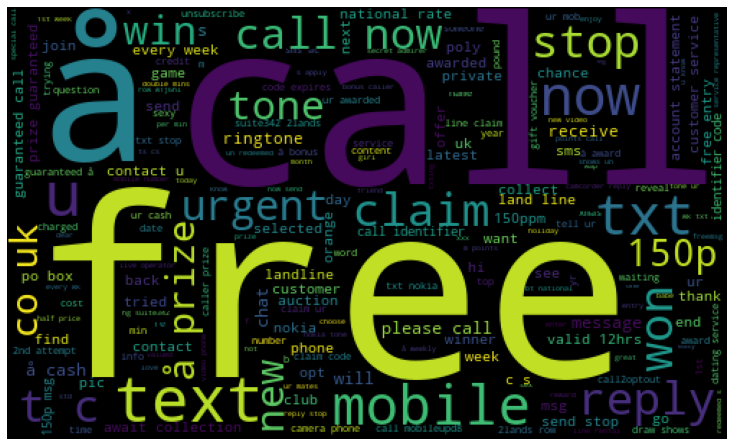

In [9]:
#Spam Word cloud
plt.figure( figsize=(10,8), facecolor='w')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

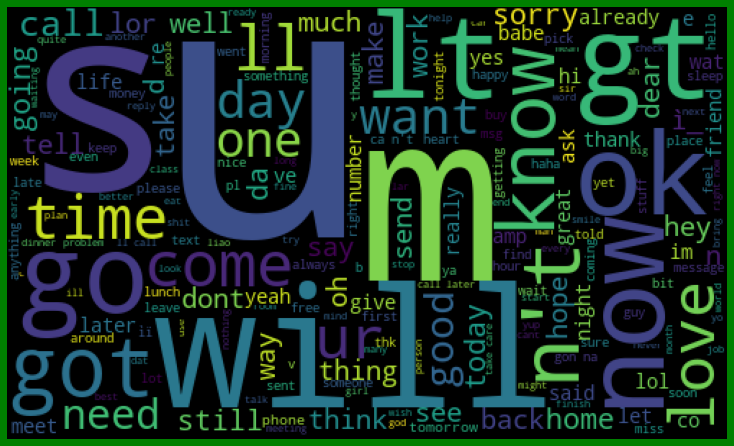

In [10]:
plt.figure( figsize=(10,8), facecolor='g')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [11]:
data = data.replace(['ham','spam'],[0, 1]) 

In [12]:
data.head(10)

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


### Removing Stopwords from the messages

In [13]:
def text_process(text):
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    
    return " ".join(text)

In [14]:
data['text'] = data['text'].apply(text_process)

In [15]:
data.head()

,label,text
0,0,Go jurong point crazy Available bugis n great ...
1,0,Ok lar Joking wif u oni
2,1,Free entry 2 wkly comp win FA Cup final tkts 2...
3,0,U dun say early hor U c already say
4,0,Nah dont think goes usf lives around though


In [16]:
text = pd.DataFrame(data['text'])
label = pd.DataFrame(data['label'])

### Converting words to vectors using TFIDF Vectorizer

In [17]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(data['text'])
vectors.shape

(5572, 9376)

In [18]:
features = vectors

### Splitting into training and test set

In [19]:
X_train, X_test, y_train, y_test = train_test_split(features, data['label'], test_size=0.20, random_state=111)

In [20]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(4457, 9376)
(1115, 9376)
(4457,)
(1115,)


## Classifying using machine learning models

In [21]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)

In [22]:
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc}

In [23]:
def train(clf, features, targets):    
    clf.fit(features, targets)

def predict(clf, features):
    return (clf.predict(features))

In [24]:
pred_scores_word_vectors = []
prediction_data = {}
for k,v in clfs.items():
    train(v, X_train, y_train)
    pred = predict(v, X_test)
    prediction_data[str(k)] = pd.DataFrame(pred, columns = ['Prediction'])
    pred_scores_word_vectors.append((k, [accuracy_score(y_test , pred)]))

In [25]:
prediction_data

{'SVC':       Prediction
 0              0
 1              0
 2              0
 3              0
 4              0
 ...          ...
 1110           0
 1111           0
 1112           0
 1113           0
 1114           0
 
 [1115 rows x 1 columns],
 'KN':       Prediction
 0              0
 1              0
 2              0
 3              0
 4              0
 ...          ...
 1110           0
 1111           0
 1112           0
 1113           0
 1114           0
 
 [1115 rows x 1 columns],
 'NB':       Prediction
 0              0
 1              0
 2              0
 3              0
 4              0
 ...          ...
 1110           0
 1111           0
 1112           0
 1113           0
 1114           0
 
 [1115 rows x 1 columns],
 'DT':       Prediction
 0              0
 1              0
 2              0
 3              0
 4              0
 ...          ...
 1110           0
 1111           0
 1112           0
 1113           0
 1114           0
 
 [1115 rows x 1 columns],

In [26]:
pred_scores_word_vectors

[('SVC', [0.979372197309417]),
 ('KN', [0.9345291479820628]),
 ('NB', [0.9856502242152466]),
 ('DT', [0.957847533632287]),
 ('LR', [0.9524663677130045]),
 ('RF', [0.9757847533632287])]

In [27]:
predictions_word_vectors = pd.DataFrame()
index_list = []
for pred in pred_scores_word_vectors:
    index_list.append(pred[0])
    predictions_word_vectors = predictions_word_vectors.append(pred[1],ignore_index=True)
predictions_word_vectors.index = index_list
predictions_word_vectors.columns = ['Score']
predictions_word_vectors

,Score
SVC,0.979372
KN,0.934529
NB,0.985650
DT,0.957848
LR,0.952466
RF,0.975785


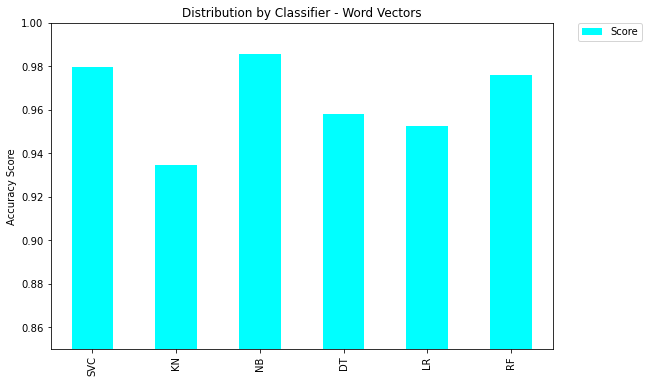

In [28]:
predictions_word_vectors.plot(kind='bar', ylim=(0.85,1.0), figsize=(9,6), align='center', colormap="cool")
plt.xticks(np.arange(6), predictions_word_vectors.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier - Word Vectors')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [29]:
def find(p):
    if p == 1:
        print ("Message is SPAM")
    else:
        print ("Message is NOT Spam")

In [30]:
text = [" Hope you enjoyed your new content"]
integers = vectorizer.transform(text)

In [31]:
p = mnb.predict(integers)[0]
find(p)        

Message is NOT Spam


## Testing our classifiers

In [32]:
text1 = ["Free tones Hope you enjoyed your new content"]
text2 = ["No.I meant the calculation is the same. That I'll call later"]
text3 = ["Had your contract mobile 11 Mnths? Latest Motorola Now"]
text4 = ["WINNER!! As a valued network customer you have"]

integers1 = vectorizer.transform(text1)
integers2 = vectorizer.transform(text2)
integers3 = vectorizer.transform(text3)
integers4 = vectorizer.transform(text4)

In [33]:
p1 = mnb.predict(integers1)[0]
p2 = mnb.predict(integers2)[0]
p3 = mnb.predict(integers3)[0]
p4 = mnb.predict(integers4)[0]

find(p1)
find(p2)
find(p3)
find(p4)

Message is SPAM
Message is NOT Spam
Message is SPAM
Message is SPAM
